In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import models,layers,regularizers, optimizers
from sklearn.model_selection import train_test_split


In [31]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [32]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_labels = np.asarray(train_dataset['label'])
train_labels = to_categorical(train_labels)

train_data = train_dataset.drop('label', axis=1)
train_data = np.asarray(train_data).reshape(train_data.shape[0], 28, 28, 1)

In [34]:
train_images, validation_images, train_labels, validation_labels = train_test_split(train_data, train_labels, test_size=0.3, random_state=40)

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, 
                shear_range=0.2, zoom_range=0.2, horizontal_flip=False, fill_mode='constant')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=294)
validation_generator = validation_datagen.flow(validation_images, validation_labels, batch_size=126)

In [37]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (294, 28, 28, 1)
labels batch shape: (294, 10)


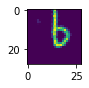

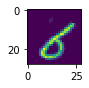

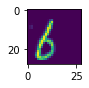

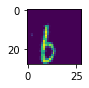

In [40]:
test_img = train_images[0].reshape(1, 28, 28, 1)
i = 0
for batch in train_datagen.flow(test_img, batch_size=1):
    plt.figure(i, figsize=(1, 1))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

In [42]:
model.compile(optimizer = optimizers.RMSprop(lr=1e-4), 
    loss='categorical_crossentropy', 
    metrics=['acc'])

In [ ]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 45s 449ms/step - loss: 1.0745 - acc: 0.7009 - val_loss: 0.3977 - val_acc: 0.9202
Epoch 2/100
 11/100 [==>...........................] - ETA: 39s - loss: 1.0493 - acc: 0.7118

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
test_images = np.asarray(test_dataset)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32')/255

In [21]:
predictions = model.predict(test_images, batch_size=128)
image_id = range(1, predictions.shape[0] + 1)

In [22]:
pred = [np.argmax(i) for i in predictions]

In [23]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission = pd.DataFrame({'ImageId': image_id, 'Label': pred})
submission.to_csv('digit_recognizer_submission', index=False)
print('file saved!')